### Mission 1. Netflix and Code

#### Mandatory Part

In [2]:
import pandas as pd
df = pd.read_csv('./archive/netflix_titles.csv')

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df['country'].unique()

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland, United States', 'Thailand', 'Nigeria',
       nan, 'Norway, Iceland, United States', 'United Kingdom', 'Japan',
       'South Korea', 'Italy', 'Canada', 'Indonesia', 'Romania', 'Spain',
       'Iceland', 'South Africa, Nigeria', 'France',
       'United States, South Africa', 'Portugal, Spain',
       'Hong Kong, China, Singapore', 'United States, Germany',
       'South Africa, China, United States', 'Argentina',
       'United States, France, Serbia', 'Germany',
       'Denmark, France, Poland', 'Poland', 'Kenya',
       'New Zealand, United Kingdom', 'Pakistan', 'Australia',
       'Australia, United States', 'Mexico, United States',
       'United States, China', 'China, Hong Kong', 'Taiwan',
       'United States, United Kingdom', 'France, South Korea, Japan',
       'United States, Canada', 'United Kingdom, United States',
       'Netherlands, Denmark, South Africa', 'Canada, Unit

In [27]:
condition = df['country'] == 'South Korea'
df.loc[condition,'show_id'].count()

183

#### Bouns Part

In [43]:
df['show_id'].groupby(by=df['country']).count()

country
Argentina                                              50
Argentina, Brazil, France, Poland, Germany, Denmark     1
Argentina, Chile                                        1
Argentina, Chile, Peru                                  1
Argentina, France                                       1
                                                       ..
Venezuela                                               1
Venezuela, Colombia                                     1
Vietnam                                                 5
West Germany                                            1
Zimbabwe                                                1
Name: show_id, Length: 681, dtype: int64

In [52]:
df['show_id'].groupby(by=df['country']).count().reset_index().sort_values(['show_id'],ascending=False)

,country,show_id
549,United States,2555
229,India,923
462,United Kingdom,397
291,Japan,226
394,South Korea,183
...,...,...
252,"Indonesia, South Korea, Singapore",1
253,"Indonesia, United Kingdom",1
254,"Indonesia, United States",1
255,"Iran, France",1


### Mission 2. 가즈아!

#### Mandatory Part

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [139]:
df = pd.read_csv('./archive/BitCoin.csv',index_col = 0)
#date 정렬
df = df.sort_values(by=['Date'])

# datetime 변환
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
# 5일 주가 이동평균
df['5-MA'] = df['Open'].rolling(window=5).mean()

# date 범위
condition = (df['Date'] >= "2016-06-01") & (df['Date'] <= "2017-06-30")
new_df = df[condition].dropna(axis=0)

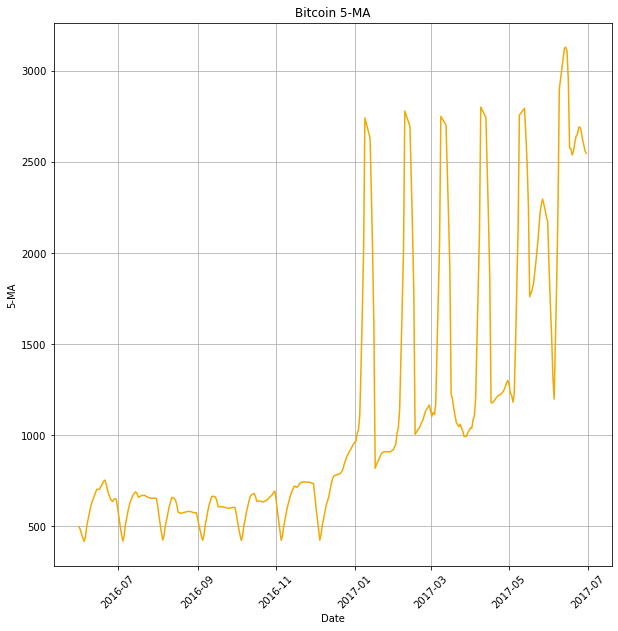

In [140]:
plt.figure(figsize = (10,10))

plt.plot(new_df['Date'],new_df['5-MA'],color = '#f2a900')

plt.grid()

plt.title('Bitcoin 5-MA')
plt.xlabel('Date')
plt.ylabel('5-MA')

plt.xticks(rotation=45)

plt.show()

#### Bonus Part

In [141]:
e_df = pd.read_csv('./archive/ETH_day.csv')

#date 정렬
e_df.sort_values(by=['Date'],inplace=True)

#datetime 변환
e_df['Date'] = pd.to_datetime(e_df['Date'],format='%Y-%m-%d')

# 5일 주가 이동평균
e_df['5-MA'] = e_df['Open'].rolling(window=5).mean()

# date 범위
condition = (e_df['Date'] >= "2016-06-01") & (e_df['Date'] <= "2017-06-30")
new_edf = e_df[condition].dropna(axis=0)

new_edf

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD,5-MA
1414,2016-06-01,ETHUSD,14.18,14.35,13.54,13.95,6390.06,89027.81,12.514
1413,2016-06-02,ETHUSD,13.95,14.13,13.82,13.90,942.85,13180.38,13.026
1412,2016-06-03,ETHUSD,13.90,16.05,13.50,14.02,11426.53,157342.19,13.444
1411,2016-06-04,ETHUSD,14.02,14.16,13.64,13.86,4330.50,59977.39,13.742
1410,2016-06-05,ETHUSD,13.86,13.92,13.70,13.91,787.49,10869.67,13.982
...,...,...,...,...,...,...,...,...,...
1024,2017-06-26,ETHUSD,278.73,299.90,210.00,253.00,249076.24,60950252.99,310.850
1023,2017-06-27,ETHUSD,253.00,288.17,210.02,286.21,173179.40,42085473.60,296.592
1022,2017-06-28,ETHUSD,286.21,324.95,260.49,317.59,184030.56,54573461.77,289.898
1021,2017-06-29,ETHUSD,317.59,322.84,285.23,293.80,152271.32,46521350.06,288.066


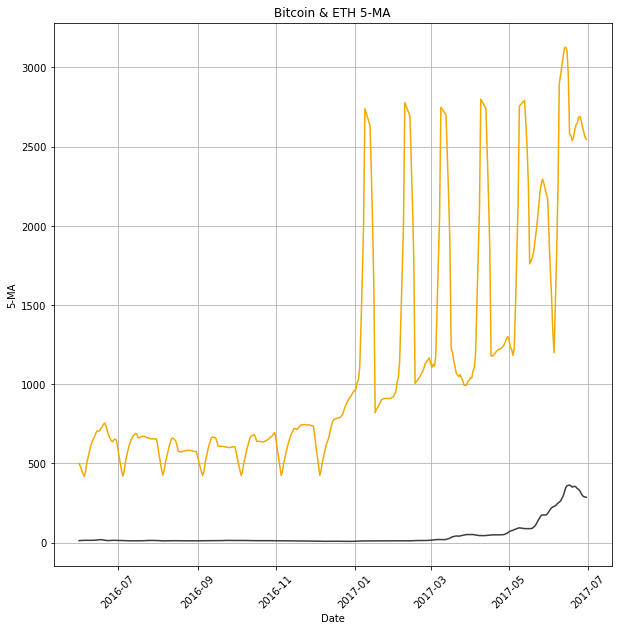

In [148]:
plt.figure(figsize = (10,10))

plt.grid()

plt.plot(new_df['Date'],new_df['5-MA'],color = '#f2a900')
plt.plot(new_edf['Date'],new_edf['5-MA'],color = '#3c3c3d')

plt.title('Bitcoin & ETH 5-MA')
plt.xlabel('Date')
plt.ylabel('5-MA')

plt.xticks(rotation=45)

plt.show()